<a href="https://colab.research.google.com/github/MALLINATHPAWAR/DS/blob/master/Credit_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis is done in below steps
1. Distribution of response variable
2. Transformation of Time Variable
3. Train and Test Split
4. Over Sampling using SMOTE
5. Variable Selection using Random Forest
6. Using Logistic for Prediction
7. Results¶
8. Future Scope


Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine
Last Updated: a year ago (Version 3)
About this Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, auc, roc_curve, confusion_matrix,precision_recall_curve
import matplotlib.pyplot as plt
from itertools import cycle

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [13]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# Distribution of reponse varible
data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

It is a highly imbalanced dataset with only o.17% transactions as fraud

In [0]:
data['Class'].value_counts()*100/data['Class'].count()

0    99.827251
1     0.172749
Name: Class, dtype: float64

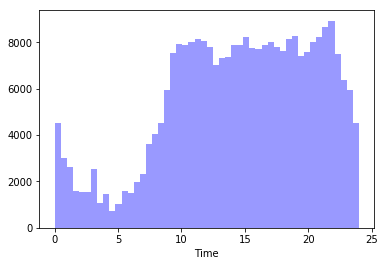

In [0]:
# Transformation of Time Variable
#Converting time from seconds to 24 hour format
sns.distplot((data['Time']/(60*60))%24, kde=False, color="b")
data['Time_of_day']=(data['Time']/(60*60))%24

Let's normalize Time_of_day and Amount

In [0]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['normTime_of_day'] = StandardScaler().fit_transform(data['Time_of_day'].values.reshape(-1, 1))
data = data.drop(['Time','Amount','Time_of_day'],axis=1)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount,normTime_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-2.486373
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-2.486373
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-2.486326
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-2.486326
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-2.486278


In [0]:
#Train and Test Split
#Dividing data into Train and Test
X = np.array(data.loc[:, data.columns != 'Class'])
y = np.array(data.loc[:, data.columns == 'Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (213605, 30)
y_train:  (213605, 1)
X_test:  (71202, 30)
y_test:  (71202, 1)


In [0]:
#Over Sampling using SMOTE
print("Fraud Count Before: ",(sum(y_train==1)))
print("Not Fraud Count Before: ",(sum(y_train==0)))

smo = SMOTE(random_state=1)
X_train_resample, y_train_resample = smo.fit_sample(X_train, y_train.ravel())

print("X_train: ", X_train_resample.shape)
print("y_train: ", y_train_resample.shape)

print("Fraud Count After: ",(sum(y_train_resample==1)))
print("Not Fraud Count After: ",(sum(y_train_resample==0)))

Fraud Count Before:  [372]
Not Fraud Count Before:  [213233]
X_train:  (426466, 30)
y_train:  (426466,)
Fraud Count After:  213233
Not Fraud Count After:  213233


Now the data is balanced with 50-50% cases of fraud and not fraud

Getting a sample of data for random forest execution, obtaining 25% of the resampled data i.e. 426466*.25



In [0]:
X_dump, X_RF, y_dump, y_RF = train_test_split(X_train_resample, y_train_resample, test_size=0.25, random_state=0)

In [0]:
#Variable Selection using Random Forest
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_RF, y_RF)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [0]:
sel.get_support()

array([False, False,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
(data.loc[:, data.columns != 'Class']).columns.values[(sel.get_support())]


array(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'],
      dtype=object)

In [0]:
selected_feat= X_RF[:,(sel.get_support())]
len(selected_feat)

106617

In [0]:
X_train_resample=X_train_resample[:,(sel.get_support())]
X_test=X_test[:,(sel.get_support())]

In [0]:
#Using Logistic for Prediction
clf = LogisticRegression(solver="lbfgs").fit(X_train_resample, y_train_resample)
pred_y = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

print ("")
print ("Classification Report: ")
print (classification_report(y_test, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(y_test, pred_y))
print ("")
#fpr, tpr, thresholds = roc_curve(y_test, pred_y, pos_label=2)
#print ("AUC: ", auc(fpr, tpr))
pd.DataFrame(confusion_matrix(y_test, pred_y)).rename(columns={0:'Negative-Not Fraud',1:'Positive-Fraud'}, index={0:'Negative-Not Fraud',1:'Positive-Fraud'})


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.06      0.90      0.11       120

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202


Accuracy Score:  0.9761804443695402



,Negative-Not Fraud,Positive-Fraud
Negative-Not Fraud,69398,1684
Positive-Fraud,12,108


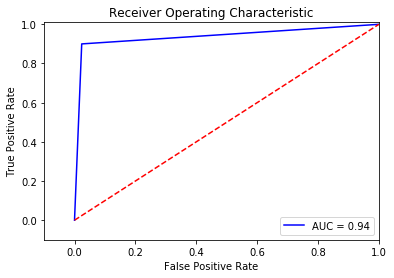

In [0]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_y)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Results
Accuracy of the model is 97.6% which is good but the precision of the model can be improved. AUROC is 0.94 which is again good 12 Fraud transaction were predicted as Not-Fraud and 1690 which were not fraud were predicted as fraud. This is good as the cost of misclassification of a fraud is more than misclassification of a No-Fraud

#Future Scope
Random Forest, XGB, Neural Network or SVM can be run and then a ensemble approach can be applied to predict better. Threshold analysis for Logistic can be done for better precision